Nama: Kalisha Rahma Firza

NPM: 2106725053

Kelas: Data Mining (B)


In [1]:
#import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import regex as re
from datetime import datetime

In [2]:
!gdown 1P6H3sYtVw7vFHx4-do3cD4cDAcFDU8KG

Downloading...
From: https://drive.google.com/uc?id=1P6H3sYtVw7vFHx4-do3cD4cDAcFDU8KG
To: /content/CaseStudy-AlumniData - CaseStudy-AlumniData.csv
100% 13.9k/13.9k [00:00<00:00, 43.0MB/s]


In [3]:
df = pd.read_csv('/content/CaseStudy-AlumniData - CaseStudy-AlumniData.csv')
df

,Alumni-ID,Timestamp,Tahun Masuk,Tahun Wisuda,Status saat ini:,Waktu Mendapatkan Pekerjaan:,Tahun masuk saat anda melanjutkan studi setelah lulus dari Prodi Matematika:,Posisi anda saat ini di tempat bekerja saat Ini:,Nama Universitas dan Kota tempat melanjutkan Studi setelah S1,Nama jurusan/program studi setelah S1,Tahun saudara mulai berwirausaha:,Bidang wirausaha:,Kesesuaian Kurikulum:,Kesesuaian Bidang Ilmu:,Perkiraan rata-rata penghasilan (take-home-pay) anda per-bulan saat ini (dalam juta rupiah):
0,1,7/25/2023 9:55,2004.0,2010.0,ASN/PNS,Kurang dari 3 bulan.,2014,Guru Kelas,Universitas Terbuka,Pendidikan Guru Sekolah Dasar,NaN,NaN,3.0,3.0,4.0
1,2,7/26/2023 10:10,2015.0,2020.0,ASN/PNS,6-12 bulan,NaN,NaN,NaN,NaN,NaN,NaN,3.0,3.0,6.0
2,3,7/28/2023 2:00,2000.0,2006.0,ASN/PNS,Kurang dari 3 bulan.,S2 2008 dan S3 2020,Dosen,S2 UI dan S3 IPB,Magister Teknologi Informasi dan Doktoral Ilmu...,NaN,NaN,5.0,5.0,5.0
3,4,7/27/2023 14:27,2014.0,2019.0,karyawan BUMN,6-12 bulan,NaN,Officer HC Solution Analysis Support,NaN,NaN,NaN,NaN,3.0,3.0,8.0
4,5,7/25/2023 9:44,2013.0,2018.0,Karyawan Swasta,Kurang dari 3 bulan.,2021,Control Tower,ITS - Surabaya,Supply Chain,NaN,NaN,4.0,3.0,15.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
205,206,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
206,207,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
207,208,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
208,209,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Pre processing

In [4]:
#hapus row 111 ke bawah karena kosong
df.drop(df[df['Alumni-ID'] > 110].index, inplace = True)

In [5]:
#rename kolom
df.rename(columns = {'Status saat ini:':'Status', 'Waktu Mendapatkan Pekerjaan:':'WMP',
                     'Tahun masuk saat anda melanjutkan studi setelah lulus dari Prodi Matematika:':'Lanjut_studi',
                     'Posisi anda saat ini di tempat bekerja saat Ini:':'Posisi',
                     'Nama Universitas dan Kota tempat melanjutkan Studi setelah S1':'Univ_Lanjutan',
                     'Nama jurusan/program studi setelah S1':'Jurusan_Lanjutan','Tahun saudara mulai berwirausaha:':'Tahun_Wirausaha',
                     'Bidang wirausaha:':'Bidang_Wirausaha','Kesesuaian Kurikulum:':'Kurikulum',
                     'Kesesuaian Bidang Ilmu:':'Kesesuaian_Bidang','Perkiraan rata-rata penghasilan (take-home-pay) anda per-bulan saat ini (dalam juta rupiah):':'Gaji'}, inplace=True)

In [6]:
df

,Alumni-ID,Timestamp,Tahun Masuk,Tahun Wisuda,Status,WMP,Lanjut_studi,Posisi,Univ_Lanjutan,Jurusan_Lanjutan,Tahun_Wirausaha,Bidang_Wirausaha,Kurikulum,Kesesuaian_Bidang,Gaji
0,1,7/25/2023 9:55,2004.0,2010.0,ASN/PNS,Kurang dari 3 bulan.,2014,Guru Kelas,Universitas Terbuka,Pendidikan Guru Sekolah Dasar,NaN,NaN,3.0,3.0,4.0
1,2,7/26/2023 10:10,2015.0,2020.0,ASN/PNS,6-12 bulan,NaN,NaN,NaN,NaN,NaN,NaN,3.0,3.0,6.0
2,3,7/28/2023 2:00,2000.0,2006.0,ASN/PNS,Kurang dari 3 bulan.,S2 2008 dan S3 2020,Dosen,S2 UI dan S3 IPB,Magister Teknologi Informasi dan Doktoral Ilmu...,NaN,NaN,5.0,5.0,5.0
3,4,7/27/2023 14:27,2014.0,2019.0,karyawan BUMN,6-12 bulan,NaN,Officer HC Solution Analysis Support,NaN,NaN,NaN,NaN,3.0,3.0,8.0
4,5,7/25/2023 9:44,2013.0,2018.0,Karyawan Swasta,Kurang dari 3 bulan.,2021,Control Tower,ITS - Surabaya,Supply Chain,NaN,NaN,4.0,3.0,15.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105,106,8/2/2023 14:39,2017.0,2023.0,Karyawan Swasta,Kurang dari 3 bulan.,NaN,Administrasi HR Database,NaN,NaN,NaN,NaN,4.0,4.0,NaN
106,107,8/2/2023 16:50,2011.0,2016.0,Karyawan Swasta,Kurang dari 3 bulan.,2018,AI & Data Analytics,Universitas Indonesia,Matematika,NaN,NaN,4.0,4.0,NaN
107,108,8/3/2023 16:37,2016.0,2021.0,Karyawan Swasta,6-12 bulan,NaN,Assistant,NaN,NaN,NaN,NaN,3.0,3.0,4.5
108,109,8/3/2023 16:44,2003.0,2007.0,Karyawan Swasta,3-6 Bulan,NaN,Branch Operation & Service Manager,NaN,NaN,NaN,NaN,2.0,2.0,NaN


In [7]:
#akan dihapus kolom timestamp karena berisi hanya waktu pengisian dari form tersebut
df.drop(['Timestamp'], axis = 1, inplace = True)

In [8]:
df

,Alumni-ID,Tahun Masuk,Tahun Wisuda,Status,WMP,Lanjut_studi,Posisi,Univ_Lanjutan,Jurusan_Lanjutan,Tahun_Wirausaha,Bidang_Wirausaha,Kurikulum,Kesesuaian_Bidang,Gaji
0,1,2004.0,2010.0,ASN/PNS,Kurang dari 3 bulan.,2014,Guru Kelas,Universitas Terbuka,Pendidikan Guru Sekolah Dasar,NaN,NaN,3.0,3.0,4.0
1,2,2015.0,2020.0,ASN/PNS,6-12 bulan,NaN,NaN,NaN,NaN,NaN,NaN,3.0,3.0,6.0
2,3,2000.0,2006.0,ASN/PNS,Kurang dari 3 bulan.,S2 2008 dan S3 2020,Dosen,S2 UI dan S3 IPB,Magister Teknologi Informasi dan Doktoral Ilmu...,NaN,NaN,5.0,5.0,5.0
3,4,2014.0,2019.0,karyawan BUMN,6-12 bulan,NaN,Officer HC Solution Analysis Support,NaN,NaN,NaN,NaN,3.0,3.0,8.0
4,5,2013.0,2018.0,Karyawan Swasta,Kurang dari 3 bulan.,2021,Control Tower,ITS - Surabaya,Supply Chain,NaN,NaN,4.0,3.0,15.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105,106,2017.0,2023.0,Karyawan Swasta,Kurang dari 3 bulan.,NaN,Administrasi HR Database,NaN,NaN,NaN,NaN,4.0,4.0,NaN
106,107,2011.0,2016.0,Karyawan Swasta,Kurang dari 3 bulan.,2018,AI & Data Analytics,Universitas Indonesia,Matematika,NaN,NaN,4.0,4.0,NaN
107,108,2016.0,2021.0,Karyawan Swasta,6-12 bulan,NaN,Assistant,NaN,NaN,NaN,NaN,3.0,3.0,4.5
108,109,2003.0,2007.0,Karyawan Swasta,3-6 Bulan,NaN,Branch Operation & Service Manager,NaN,NaN,NaN,NaN,2.0,2.0,NaN


In [9]:
#bikin kolom baru lama studi
df["Lama_Studi"]= df["Tahun Wisuda"] - df["Tahun Masuk"]
df

,Alumni-ID,Tahun Masuk,Tahun Wisuda,Status,WMP,Lanjut_studi,Posisi,Univ_Lanjutan,Jurusan_Lanjutan,Tahun_Wirausaha,Bidang_Wirausaha,Kurikulum,Kesesuaian_Bidang,Gaji,Lama_Studi
0,1,2004.0,2010.0,ASN/PNS,Kurang dari 3 bulan.,2014,Guru Kelas,Universitas Terbuka,Pendidikan Guru Sekolah Dasar,NaN,NaN,3.0,3.0,4.0,6.0
1,2,2015.0,2020.0,ASN/PNS,6-12 bulan,NaN,NaN,NaN,NaN,NaN,NaN,3.0,3.0,6.0,5.0
2,3,2000.0,2006.0,ASN/PNS,Kurang dari 3 bulan.,S2 2008 dan S3 2020,Dosen,S2 UI dan S3 IPB,Magister Teknologi Informasi dan Doktoral Ilmu...,NaN,NaN,5.0,5.0,5.0,6.0
3,4,2014.0,2019.0,karyawan BUMN,6-12 bulan,NaN,Officer HC Solution Analysis Support,NaN,NaN,NaN,NaN,3.0,3.0,8.0,5.0
4,5,2013.0,2018.0,Karyawan Swasta,Kurang dari 3 bulan.,2021,Control Tower,ITS - Surabaya,Supply Chain,NaN,NaN,4.0,3.0,15.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105,106,2017.0,2023.0,Karyawan Swasta,Kurang dari 3 bulan.,NaN,Administrasi HR Database,NaN,NaN,NaN,NaN,4.0,4.0,NaN,6.0
106,107,2011.0,2016.0,Karyawan Swasta,Kurang dari 3 bulan.,2018,AI & Data Analytics,Universitas Indonesia,Matematika,NaN,NaN,4.0,4.0,NaN,5.0
107,108,2016.0,2021.0,Karyawan Swasta,6-12 bulan,NaN,Assistant,NaN,NaN,NaN,NaN,3.0,3.0,4.5,5.0
108,109,2003.0,2007.0,Karyawan Swasta,3-6 Bulan,NaN,Branch Operation & Service Manager,NaN,NaN,NaN,NaN,2.0,2.0,NaN,4.0


In [10]:
#informasi mengenai data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110 entries, 0 to 109
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Alumni-ID          110 non-null    int64  
 1   Tahun Masuk        110 non-null    float64
 2   Tahun Wisuda       110 non-null    float64
 3   Status             110 non-null    object 
 4   WMP                110 non-null    object 
 5   Lanjut_studi       24 non-null     object 
 6   Posisi             84 non-null     object 
 7   Univ_Lanjutan      24 non-null     object 
 8   Jurusan_Lanjutan   24 non-null     object 
 9   Tahun_Wirausaha    13 non-null     object 
 10  Bidang_Wirausaha   12 non-null     object 
 11  Kurikulum          110 non-null    float64
 12  Kesesuaian_Bidang  110 non-null    float64
 13  Gaji               66 non-null     float64
 14  Lama_Studi         110 non-null    float64
dtypes: float64(6), int64(1), object(8)
memory usage: 13.0+ KB


In [11]:
#jumlah missing value
df.isna().sum()

Alumni-ID             0
Tahun Masuk           0
Tahun Wisuda          0
Status                0
WMP                   0
Lanjut_studi         86
Posisi               26
Univ_Lanjutan        86
Jurusan_Lanjutan     86
Tahun_Wirausaha      97
Bidang_Wirausaha     98
Kurikulum             0
Kesesuaian_Bidang     0
Gaji                 44
Lama_Studi            0
dtype: int64

In [12]:
#persentase missing value
(df.isnull().sum()/len(df)).to_frame('Persentase Missing Value')

,Persentase Missing Value
Alumni-ID,0.000000
Tahun Masuk,0.000000
Tahun Wisuda,0.000000
Status,0.000000
WMP,0.000000
Lanjut_studi,0.781818
Posisi,0.236364
Univ_Lanjutan,0.781818
Jurusan_Lanjutan,0.781818
Tahun_Wirausaha,0.881818


In [13]:
df['Lanjut_studi'].value_counts()

-                      6
2021                   3
2023                   2
2011                   2
2018                   2
2014                   1
S2 2008 dan S3 2020    1
2016                   1
2008                   1
2020                   1
2017                   1
2022                   1
2019                   1
2013                   1
Name: Lanjut_studi, dtype: int64

In [14]:
df['Lanjut_studi'] = df['Lanjut_studi'].replace({"-":pd.np.nan})

<ipython-input-14-6bef868acd4d>:1: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead.
  df['Lanjut_studi'] = df['Lanjut_studi'].replace({"-":pd.np.nan})


In [15]:
df['Posisi'].value_counts()

Dosen                                 4
-                                     4
Data Analyst                          3
Guru                                  2
Quantitative Research Executive       2
                                     ..
Guru Honorer Matematika               1
Power BI Developer Staff              1
Data Analis                           1
Staff Data Processing                 1
Branch Operation & Service Manager    1
Name: Posisi, Length: 73, dtype: int64

In [16]:
df['Posisi'] = df['Posisi'].replace({"-":pd.np.nan, "Data Analis":"Data Analyst", "Data analis":"Data Analyst"})

<ipython-input-16-24550ba37de5>:1: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead.
  df['Posisi'] = df['Posisi'].replace({"-":pd.np.nan, "Data Analis":"Data Analyst", "Data analis":"Data Analyst"})


In [17]:
df['Univ_Lanjutan'].value_counts()

-                                                                                          6
Universitas Indonesia                                                                      2
Institut Teknologi Bandung                                                                 2
Universitas Terbuka                                                                        1
UNJ                                                                                        1
Universitas Islam Negeri Jakarta                                                           1
Unindra PGRI Jakarta                                                                       1
Chongqing University, Chongqing, China                                                     1
Universitas Ibnu Chaldun Jakarta                                                           1
Universitas Indonesia, Depok                                                               1
Magister Matematika Universitas Indonesia dan Doktor Matematika Univer

In [18]:
df['Univ_Lanjutan'].replace({"-":pd.np.nan, "Universitas Indonesia, Depok":"Universitas Indonesia", "IPB / Bogor":"IPB"})

<ipython-input-18-8feb3075912d>:1: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead.
  df['Univ_Lanjutan'].replace({"-":pd.np.nan, "Universitas Indonesia, Depok":"Universitas Indonesia", "IPB / Bogor":"IPB"})


0        Universitas Terbuka
1                        NaN
2           S2 UI dan S3 IPB
3                        NaN
4             ITS - Surabaya
               ...          
105                      NaN
106    Universitas Indonesia
107                      NaN
108                      NaN
109                      NaN
Name: Univ_Lanjutan, Length: 110, dtype: object

In [19]:
df['Jurusan_Lanjutan'].value_counts()

-                                                          6
Matematika                                                 5
Pendidikan Guru Sekolah Dasar                              1
Magister Teknologi Informasi dan Doktoral Ilmu Komputer    1
Supply Chain                                               1
AKTA 4                                                     1
Statistika dan Sains Data                                  1
Statistika                                                 1
Pendidikan Matematika                                      1
Komunikasi dan Penyiaran Islam                             1
Biomedical Engineering                                     1
Pendidikan matematika                                      1
Sains Komputasi                                            1
Psikologi/Psikometri                                       1
Manajemen                                                  1
Name: Jurusan_Lanjutan, dtype: int64

In [20]:
df['Jurusan_Lanjutan'] = df['Jurusan_Lanjutan'].replace({"-":pd.np.nan})

<ipython-input-20-ea901a481eac>:1: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead.
  df['Jurusan_Lanjutan'] = df['Jurusan_Lanjutan'].replace({"-":pd.np.nan})


In [21]:
df['Tahun_Wirausaha'].value_counts()

-       6
2018    2
2019    2
2017    1
2012    1
2023    1
Name: Tahun_Wirausaha, dtype: int64

In [22]:
df['Tahun_Wirausaha'] = df['Tahun_Wirausaha'].replace({"-":pd.np.nan})

<ipython-input-22-96bc852f6ce0>:1: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead.
  df['Tahun_Wirausaha'] = df['Tahun_Wirausaha'].replace({"-":pd.np.nan})


In [23]:
df['Bidang_Wirausaha'].value_counts()

-                                                                                                                   6
Retail                                                                                                              1
Wadah kredit angsuran dan investasi syariah, jual beli barang dengan akad murabahah tanpa riba dan tanpa wakalah    1
Jasa Privat dan Bimbingan Belajar Zhofir Tutors                                                                     1
Retail furniture kayu, produksi dan penjualan mebel kayu                                                            1
Online shop dibidang fashion                                                                                        1
Memiliki bimbel private                                                                                             1
Name: Bidang_Wirausaha, dtype: int64

In [24]:
df['Bidang_Wirausaha'] = df['Bidang_Wirausaha'].replace({"-":pd.np.nan})

<ipython-input-24-b1a06c46de63>:1: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead.
  df['Bidang_Wirausaha'] = df['Bidang_Wirausaha'].replace({"-":pd.np.nan})


In [25]:
df['Gaji'].value_counts()

6.00     16
5.00     12
4.00     10
7.00      4
2.00      4
8.00      3
15.00     2
8.50      2
20.00     1
3.50      1
14.00     1
10.00     1
12.00     1
1.00      1
4.90      1
40.00     1
5.75      1
18.00     1
3.00      1
65.00     1
4.50      1
Name: Gaji, dtype: int64

In [26]:
df

,Alumni-ID,Tahun Masuk,Tahun Wisuda,Status,WMP,Lanjut_studi,Posisi,Univ_Lanjutan,Jurusan_Lanjutan,Tahun_Wirausaha,Bidang_Wirausaha,Kurikulum,Kesesuaian_Bidang,Gaji,Lama_Studi
0,1,2004.0,2010.0,ASN/PNS,Kurang dari 3 bulan.,2014,Guru Kelas,Universitas Terbuka,Pendidikan Guru Sekolah Dasar,NaN,NaN,3.0,3.0,4.0,6.0
1,2,2015.0,2020.0,ASN/PNS,6-12 bulan,NaN,NaN,NaN,NaN,NaN,NaN,3.0,3.0,6.0,5.0
2,3,2000.0,2006.0,ASN/PNS,Kurang dari 3 bulan.,S2 2008 dan S3 2020,Dosen,S2 UI dan S3 IPB,Magister Teknologi Informasi dan Doktoral Ilmu...,NaN,NaN,5.0,5.0,5.0,6.0
3,4,2014.0,2019.0,karyawan BUMN,6-12 bulan,NaN,Officer HC Solution Analysis Support,NaN,NaN,NaN,NaN,3.0,3.0,8.0,5.0
4,5,2013.0,2018.0,Karyawan Swasta,Kurang dari 3 bulan.,2021,Control Tower,ITS - Surabaya,Supply Chain,NaN,NaN,4.0,3.0,15.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105,106,2017.0,2023.0,Karyawan Swasta,Kurang dari 3 bulan.,NaN,Administrasi HR Database,NaN,NaN,NaN,NaN,4.0,4.0,NaN,6.0
106,107,2011.0,2016.0,Karyawan Swasta,Kurang dari 3 bulan.,2018,AI & Data Analytics,Universitas Indonesia,Matematika,NaN,NaN,4.0,4.0,NaN,5.0
107,108,2016.0,2021.0,Karyawan Swasta,6-12 bulan,NaN,Assistant,NaN,NaN,NaN,NaN,3.0,3.0,4.5,5.0
108,109,2003.0,2007.0,Karyawan Swasta,3-6 Bulan,NaN,Branch Operation & Service Manager,NaN,NaN,NaN,NaN,2.0,2.0,NaN,4.0


In [27]:
#data duplicate
df.duplicated().sum()

0

tidak ada data terduplikasi

In [28]:
#mengisi missing values
df['Posisi'] = df['Posisi'].fillna('Tidak Diketahui')
df['Lanjut_studi'] = df['Lanjut_studi'].fillna('Tidak Melanjutkan Pendidikan')
df['Univ_Lanjutan'] = df['Univ_Lanjutan'].fillna('Tidak Melanjutkan Pendidikan')
df['Jurusan_Lanjutan'] = df['Jurusan_Lanjutan'].fillna('Tidak Melanjutkan Pendidikan')
df['Tahun_Wirausaha'] = df['Tahun_Wirausaha'].fillna(0)
df['Bidang_Wirausaha'] = df['Bidang_Wirausaha'].fillna('Tidak Berwirausaha')

In [29]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [30]:
imputer = IterativeImputer(max_iter=10, random_state=0)
#mengisi missing values gaji
df['Gaji'] = imputer.fit_transform(df[['Gaji']])

In [31]:
#koreksi tipe data
df['Status'] = df['Status'].astype('category')
df['WMP'] = df['WMP'].astype('category')
df['Univ_Lanjutan'] = df['Univ_Lanjutan'].astype('category')
df['Jurusan_Lanjutan'] = df['Jurusan_Lanjutan'].astype('category')
df['Bidang_Wirausaha'] = df['Bidang_Wirausaha'].astype('category')
df['Kurikulum'] = df['Kurikulum'].astype('category')
df['Kesesuaian_Bidang'] = df['Kesesuaian_Bidang'].astype('category')

In [32]:
df

,Alumni-ID,Tahun Masuk,Tahun Wisuda,Status,WMP,Lanjut_studi,Posisi,Univ_Lanjutan,Jurusan_Lanjutan,Tahun_Wirausaha,Bidang_Wirausaha,Kurikulum,Kesesuaian_Bidang,Gaji,Lama_Studi
0,1,2004.0,2010.0,ASN/PNS,Kurang dari 3 bulan.,2014,Guru Kelas,Universitas Terbuka,Pendidikan Guru Sekolah Dasar,0,Tidak Berwirausaha,3.0,3.0,4.000000,6.0
1,2,2015.0,2020.0,ASN/PNS,6-12 bulan,Tidak Melanjutkan Pendidikan,Tidak Diketahui,Tidak Melanjutkan Pendidikan,Tidak Melanjutkan Pendidikan,0,Tidak Berwirausaha,3.0,3.0,6.000000,5.0
2,3,2000.0,2006.0,ASN/PNS,Kurang dari 3 bulan.,S2 2008 dan S3 2020,Dosen,S2 UI dan S3 IPB,Magister Teknologi Informasi dan Doktoral Ilmu...,0,Tidak Berwirausaha,5.0,5.0,5.000000,6.0
3,4,2014.0,2019.0,karyawan BUMN,6-12 bulan,Tidak Melanjutkan Pendidikan,Officer HC Solution Analysis Support,Tidak Melanjutkan Pendidikan,Tidak Melanjutkan Pendidikan,0,Tidak Berwirausaha,3.0,3.0,8.000000,5.0
4,5,2013.0,2018.0,Karyawan Swasta,Kurang dari 3 bulan.,2021,Control Tower,ITS - Surabaya,Supply Chain,0,Tidak Berwirausaha,4.0,3.0,15.000000,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105,106,2017.0,2023.0,Karyawan Swasta,Kurang dari 3 bulan.,Tidak Melanjutkan Pendidikan,Administrasi HR Database,Tidak Melanjutkan Pendidikan,Tidak Melanjutkan Pendidikan,0,Tidak Berwirausaha,4.0,4.0,7.646212,6.0
106,107,2011.0,2016.0,Karyawan Swasta,Kurang dari 3 bulan.,2018,AI & Data Analytics,Universitas Indonesia,Matematika,0,Tidak Berwirausaha,4.0,4.0,7.646212,5.0
107,108,2016.0,2021.0,Karyawan Swasta,6-12 bulan,Tidak Melanjutkan Pendidikan,Assistant,Tidak Melanjutkan Pendidikan,Tidak Melanjutkan Pendidikan,0,Tidak Berwirausaha,3.0,3.0,4.500000,5.0
108,109,2003.0,2007.0,Karyawan Swasta,3-6 Bulan,Tidak Melanjutkan Pendidikan,Branch Operation & Service Manager,Tidak Melanjutkan Pendidikan,Tidak Melanjutkan Pendidikan,0,Tidak Berwirausaha,2.0,2.0,7.646212,4.0


In [33]:
# cek kembali jumlah missing value
df.isna().sum()

Alumni-ID            0
Tahun Masuk          0
Tahun Wisuda         0
Status               0
WMP                  0
Lanjut_studi         0
Posisi               0
Univ_Lanjutan        0
Jurusan_Lanjutan     0
Tahun_Wirausaha      0
Bidang_Wirausaha     0
Kurikulum            0
Kesesuaian_Bidang    0
Gaji                 0
Lama_Studi           0
dtype: int64

missing values sudah tidak ada/tergantikan

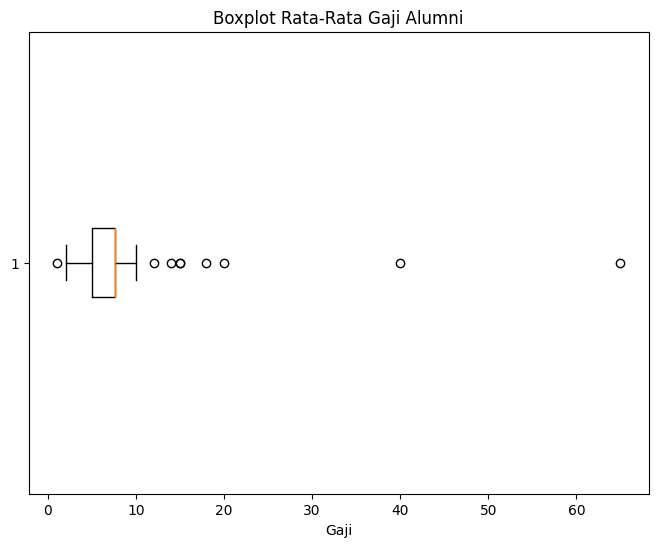

In [34]:
#outlier

plt.figure(figsize=(8, 6))  # Ukuran figur (opsional)
plt.boxplot(df['Gaji'], vert=False)  # vert=False membuat boxplot horizontal
plt.xlabel('Gaji')  # Label sumbu x (opsional)
plt.title('Boxplot Rata-Rata Gaji Alumni')  # Judul plot (opsional)
plt.show()  # Menampilkan plot

In [35]:
#akan di cek rata-rata gaji yang <3 atau gajinya kecil
df.loc[df['Gaji'] < 3 ]

,Alumni-ID,Tahun Masuk,Tahun Wisuda,Status,WMP,Lanjut_studi,Posisi,Univ_Lanjutan,Jurusan_Lanjutan,Tahun_Wirausaha,Bidang_Wirausaha,Kurikulum,Kesesuaian_Bidang,Gaji,Lama_Studi
40,41,2016.0,2021.0,Karyawan Swasta,3-6 Bulan,Tidak Melanjutkan Pendidikan,Support Marketing Agency,Tidak Melanjutkan Pendidikan,Tidak Melanjutkan Pendidikan,0,Tidak Berwirausaha,3.0,3.0,2.0,5.0
59,60,2017.0,2022.0,"Karyawan, Melanjutkan Studi",Kurang dari 3 bulan.,2022,Guru,UNJ,Pendidikan Matematika,0,Tidak Berwirausaha,5.0,4.0,2.0,5.0
67,68,2013.0,2018.0,Melanjutkan Studi,3-6 Bulan,2019,Tidak Diketahui,"Chongqing University, Chongqing, China",Biomedical Engineering,0,Tidak Berwirausaha,3.0,2.0,1.0,5.0
70,71,2003.0,2007.0,Wirausaha,Kurang dari 3 bulan.,Tidak Melanjutkan Pendidikan,Tidak Diketahui,Tidak Melanjutkan Pendidikan,Tidak Melanjutkan Pendidikan,2017,Retail,4.0,4.0,2.0,4.0
93,94,2019.0,2023.0,Melamar Pekerjaan,Belum mendapatkan pekerjaan,Tidak Melanjutkan Pendidikan,Corporate Planning Analyst Intern,Tidak Melanjutkan Pendidikan,Tidak Melanjutkan Pendidikan,2023,Tidak Berwirausaha,5.0,3.0,2.0,4.0


Diperoleh bahwa masih masuk akal atau wajar gaji yang memang diperoleh alumni tersebut misalnya alumni tersebut masih sedang kuliah, sehingga dibiarkan.

# Apakah ada hubungan antara lama studi dengan rata-rata gaji yang diperoleh?

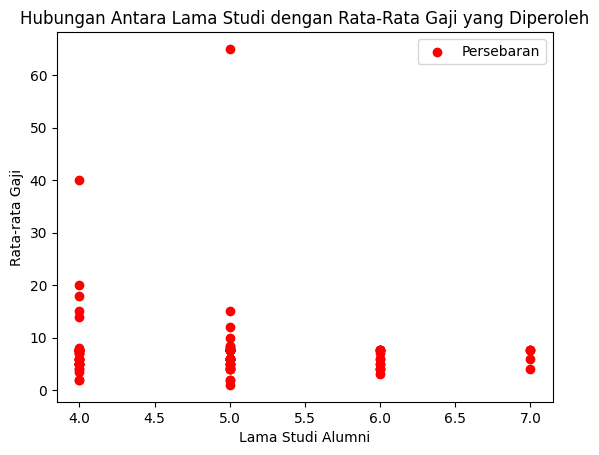

In [40]:
plt.scatter(x=df['Lama_Studi'], y=df['Gaji'], label='Persebaran', color='red', marker='o')

plt.xlabel('Lama Studi Alumni')
plt.ylabel('Rata-rata Gaji')
plt.title('Hubungan Antara Lama Studi dengan Rata-Rata Gaji yang Diperoleh')
plt.legend()
plt.show()

Berdasarkan hasil di atas, dapat dilihat bahwa :

Semakin kecil lama studi atau semakin cepat alumni tersebut lulus, rata-rata gaji yang diperoleh lebih besar dibandingkan dengan alumni memiliki lama studi lebih lama.

# Apakah ada hubungan status pekerjaan alumni dengan rata-rata gaji yang diperoleh?

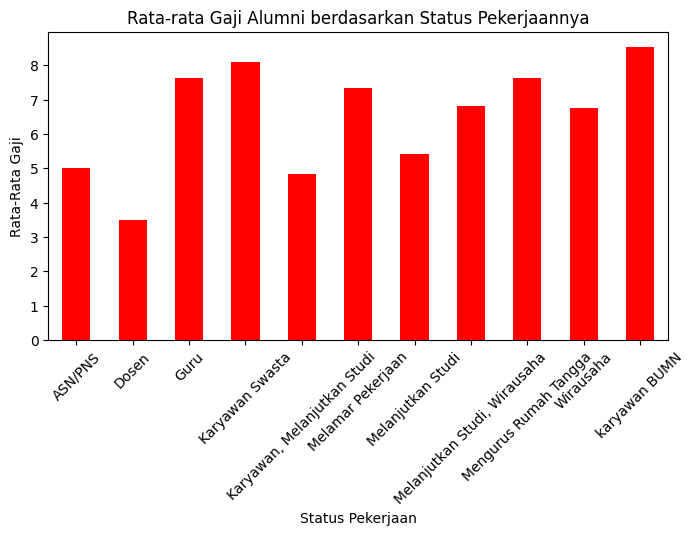

In [37]:
rata_gaji = df.groupby('Status')['Gaji'].mean()

plt.figure(figsize=(8, 4))
rata_gaji.plot(kind='bar',color = 'red')
plt.title('Rata-rata Gaji Alumni berdasarkan Status Pekerjaannya')
plt.xlabel('Status Pekerjaan')
plt.ylabel('Rata-Rata Gaji')
plt.xticks(rotation=45)
plt.show()

# Seberapa sesuai bidang kerja yang diguliti saat ini oleh alumni?

In [38]:
persentase_kesesuaian = df['Kesesuaian_Bidang'].value_counts()

persentase_kesesuaian

4.0    38
3.0    34
5.0    22
2.0    12
1.0     4
Name: Kesesuaian_Bidang, dtype: int64

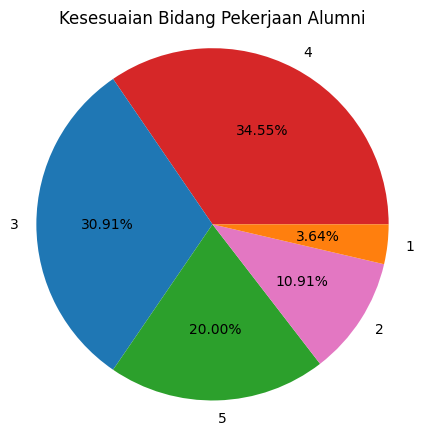

In [39]:
colors = ['tab:red', 'tab:blue', 'tab:green', 'tab:pink', 'tab:orange' ]
labels = ['4','3','5','2','1']

#membuat pie chart
plt.figure(figsize=(5, 5))
plt.pie(persentase_kesesuaian, labels= labels, colors = colors, autopct='%.2f%%', pctdistance=0.6)

plt.title('Kesesuaian Bidang Pekerjaan Alumni')
plt.axis('equal')
plt.show()